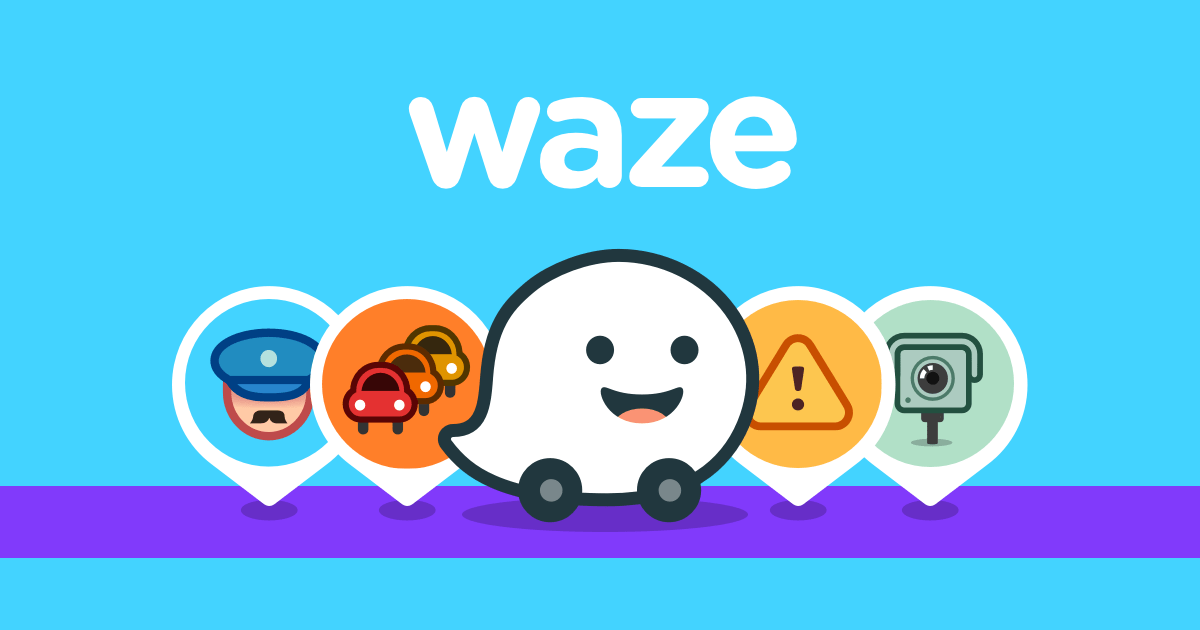

In [1]:
import panel as pn

In [2]:
import pandas_profiling as pdp
import pandas as pd
import ipywidgets as widgets
from ipywidgets import IntSlider
import folium
# import matplotlib
# matplotlib.use('WebAgg')
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from folium.plugins import MarkerCluster 
from IPython.nbformat.current import read, write
import ipywidgets as widgets
from ipywidgets import interact, interact_manual,fixed,ToggleButton
from IPython.display import clear_output



Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
C:\ProgramData\Anaconda3\lib\site-packages\IPython\nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
C:\ProgramData\Anaconda3\lib\site-packages\nbformat\current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


In [3]:
alert=pd.read_excel(r"Z:\פרוייקטים\מאגרי מידע\סטטיסטיקה\WAZE\נתוני יוני 2020\Alert.xlsx")
iregular_jams=pd.read_excel(r"Z:\פרוייקטים\מאגרי מידע\סטטיסטיקה\WAZE\נתוני יוני 2020\IregularJams.xlsx")
jams=pd.read_excel(r"Z:\פרוייקטים\מאגרי מידע\סטטיסטיקה\WAZE\נתוני יוני 2020\Jams.xlsx")

# <font color=green><red># Alert: Information by User </font>

In [ ]:
profile_alert = pdp.ProfileReport(alert)
profile_alert 

# <font color=green><red>#IRegular Jams: Information of Iregular Jam </font>

In [ ]:
profile_iregular_jams = pdp.ProfileReport(iregular_jams)
profile_iregular_jams

# <font color=green><red>#Jams: Information product by User of Jam </font>

In [ ]:
profile_jams = pdp.ProfileReport(jams)
profile_jams 

In [4]:
alert['PublicationTime']=alert['PublicationTime'].astype(str)
alert['PublicationTime']=alert['PublicationTime'].str[:19]
alert['Date']=pd.to_datetime(alert['PublicationTime'].str[:10])
alert['Time']=pd.to_datetime(alert['PublicationTime'].str[11:20], format='%H:%M:%S').dt.time
alert['Time']=alert['Time'].astype(str)
alert['Hour']=alert['Time'].str[:2]
alert['Hour']=alert['Hour'].astype(int)
alert['Key']=alert['Day'].map(str)+alert['Hour'].map(str)
alert.groupby('AlertType').size()
alert['PublicationTime']=pd.to_datetime(alert['PublicationTime'])
alert['PublicationTime']=alert['PublicationTime'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [5]:
iregular_jams['PublicationTime']=iregular_jams['PublicationTime'].astype(str)
iregular_jams['PublicationTime']=iregular_jams['PublicationTime'].str[:19]
iregular_jams['Pub_Date']=pd.to_datetime(iregular_jams['PublicationTime'].str[:10])
iregular_jams['Pub_Time']=pd.to_datetime(iregular_jams['PublicationTime'].str[11:20], format='%H:%M:%S').dt.time
iregular_jams['LastUpdate']=iregular_jams['LastUpdate'].astype(str)
iregular_jams['LastUpdate']=iregular_jams['LastUpdate'].str[:19]
iregular_jams['LU_Date']=pd.to_datetime(iregular_jams['LastUpdate'].str[:10])
iregular_jams['LU_Time']=pd.to_datetime(iregular_jams['LastUpdate'].str[11:20], format='%H:%M:%S').dt.time


In [6]:
jams['PublicationTime']=jams['PublicationTime'].astype(str)
jams['PublicationTime']=jams['PublicationTime'].str[:19]
jams['Date']=pd.to_datetime(jams['PublicationTime'].str[:10])
jams['Time']=pd.to_datetime(jams['PublicationTime'].str[11:20], format='%H:%M:%S').dt.time
jams['Day']=jams['Date'].dt.day

# <font color=Blue><red>#Average of different accident per Hour </font>

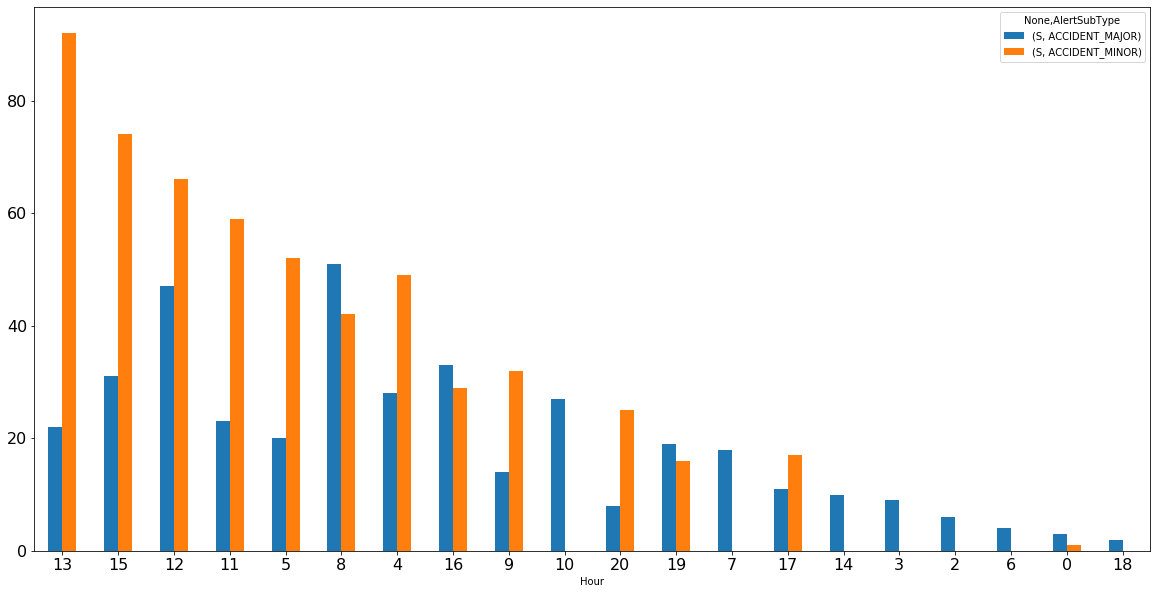

In [11]:
AlertSubTypepivot=alert[alert['AlertType']=='ACCIDENT'].groupby(['Hour','AlertSubType']).size().to_frame('S').drop_duplicates().sort_values('S', ascending=False).unstack().plot.bar(figsize = (20,10),rot=0,fontsize=16)


# <font color=Blue><red>#Position of different accident </font>

In [12]:
from folium import Map, FeatureGroup, Marker, LayerControl
data=alert[alert['AlertSubType']=='ACCIDENT_MAJOR'][['Latitude','Longitude']].drop_duplicates()
data

this_map = folium.Map(prefer_canvas=True,tiles='openstreetmap')
def plotDot(latitude,longitude,color):
    
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[latitude, longitude],
                        radius=2,
                        color=color,
                        weight=5).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
data.apply(lambda x: plotDot(x['Latitude'],x['Longitude'],'red'), axis = 1)
#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())
minor=alert[alert['AlertSubType']=='ACCIDENT_MINOR'][['Latitude','Longitude']]

minor.apply(lambda x: plotDot(x['Latitude'],x['Longitude'],'blue'), axis = 1)


this_map




# <font color=Blue><red>#Num of Accident by Cluster </font>
    

In [13]:
this_map = folium.Map(prefer_canvas=True,tiles='openstreetmap')
data=alert[(alert['AlertSubType']=='ACCIDENT_MAJOR')| (alert['AlertSubType']=='ACCIDENT_MINOR')][['Latitude','Longitude']].drop_duplicates()
this_map = folium.Map(prefer_canvas=True,tiles='openstreetmap')
locations = list(zip(data.Latitude, data.Longitude))
icons = [folium.Icon(icon="car", prefix="fa") for _ in range(len(locations))]
cluster = MarkerCluster(locations=locations, icons=icons)
this_map.add_child(cluster)
this_map.fit_bounds(this_map.get_bounds())
this_map


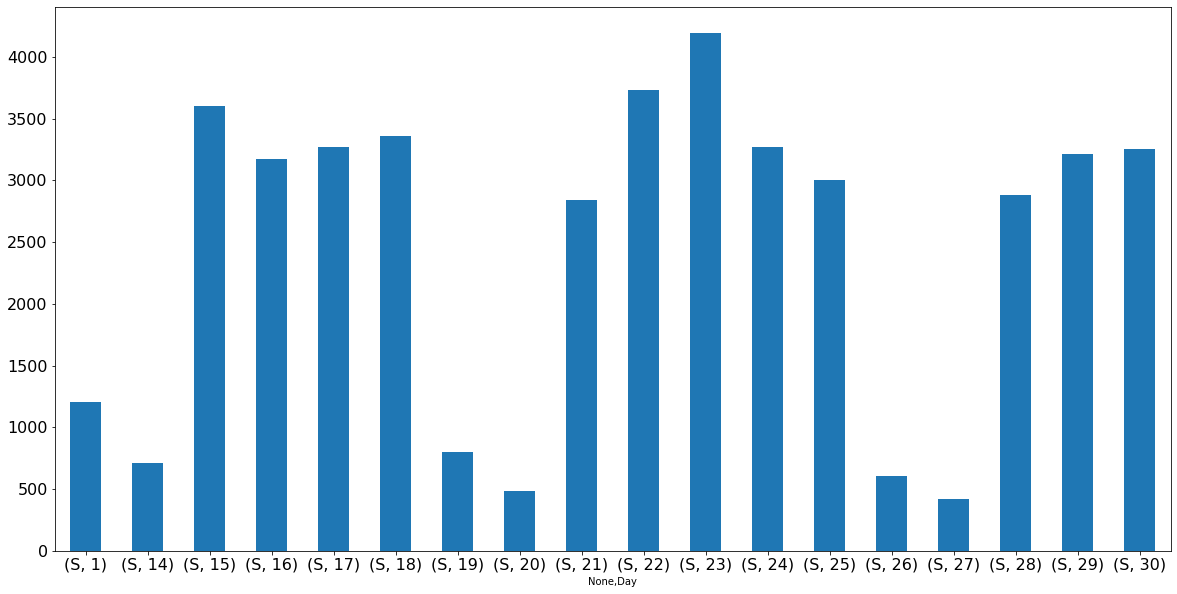

In [14]:
alert[alert['AlertType']=='JAM'].groupby('Day').size().to_frame('S').unstack().plot.bar(figsize = (20,10),rot=0,fontsize=16)

# <font color=Blue><red>#Analyse Jam by specific Day and Hour </font>

In [7]:
import folium
import folium.plugins as plugins
import numpy as np
import webbrowser
from datetime import datetime, timedelta
from traitlets.config import Config
this_map = folium.Map(prefer_canvas=True,tiles='cartodbpositron',zoom_start =13)
def datafun(d,h,color):
    return alert[(alert['AlertType']=='JAM') & 
           (alert['Day']==d)& 
           (alert['Hour']==h) ].drop_duplicates().apply(lambda x: plotDot(x['Latitude'],x['Longitude'],color), axis = 1)

def plotDot(latitude,longitude,color):
   
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[latitude, longitude],
                        radius=2,
                        color=color,
                        weight=5).add_to(this_map)
    return this_map
d = widgets.IntSlider(  description='Day',min=14, max=alert['Day'].max(), value=alert['Day'].min())
h = widgets.IntSlider(description='Hour',min=alert['Hour'].min(), max=alert['Hour'].max(), value=alert['Hour'].min())
display(d,h)


button = widgets.Button(description="GO!")
output = widgets.Output()
button. button_style='warning'
display(button, output)

def on_button_clicked(b,remove=True):
    with output:
        datafun(d.value,h.value,'red')
        clear_output(wait=True)
        this_map.fit_bounds(this_map.get_bounds())
        display(this_map)
        
button.on_click(on_button_clicked)

IntSlider(value=14, description='Day', max=30, min=14)

IntSlider(value=0, description='Hour', max=23)

Button(button_style='warning', description='GO!', style=ButtonStyle())

Output()

In [45]:
def plotDot(latitude,longitude,color):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[latitude, longitude],
                        radius=2,
                        color=color,
                        weight=5).add_to(this_mapl)
# If you want a night map: cartodbdark_matter
this_map = folium.Map(prefer_canvas=True,tiles='cartodbpositron',zoom_start =13)
zoom_slider = IntSlider(description='Zoom level:', min=0, max=15, value=7)
this_mapl = folium.Map(prefer_canvas=True,tiles='cartodbpositron',zoom_start =13)
datafun(15,6,'red')
this_mapl.fit_bounds(this_mapl.get_bounds())
display(this_mapl)

# <font color=Blue><red>#Experience with widget </font>

In [ ]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, CircleMarker,FullScreenControl
from ipywidgets import IntSlider, ColorPicker, jslink

m = Map(center=(31.771959, 35.217018),
    zoom=13, basemap=basemaps.CartoDB.Positron,scroll_wheel_zoom=True
)
m.add_control(FullScreenControl())
def plotDot(m,latitude,longitude,color):
    
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    m.add_layer(CircleMarker(location = (latitude, longitude),radius = 2,color = color))

m.layout.width = '100%'
m.layout.height = '800px'
def datafunc(day,hour):
    data=alert[(alert['AlertType']=='JAM') & 
               (alert['Day']==day)& 
               (alert['Hour']==hour) ][['Latitude','Longitude','PublicationTime']].drop_duplicates()

data.apply(lambda x: plotDot(m,x['Latitude'],x['Longitude'],'orange'), axis = 1)
zoom_slider = IntSlider(description='Zoom level:', min=0, max=15, value=7)
jslink((zoom_slider, 'value'), (datafunc, day))


widget_control1 = WidgetControl(widget=zoom_slider, position='topright')
m.add_control(widget_control1)
# # Day_slider = IntSlider(description='Day:', min=data['Day'].min(), max=data['Day'].max())
# jslink((Day_slider, 'value'), (m, 'zoom'))
# widget_control1 = WidgetControl(widget=zoom_slider, position='topright')
# m.add_control(widget_control1)
# @interact
# def show_articles_more_than(column='Day',column2='Hour', x=data['Day'].unique().tolist(),y=data['Hour'].unique().tolist()):
#     m = Map(center=(31.771959, 35.217018),
#     zoom=13, basemap=basemaps.CartoDB.Positron,scroll_wheel_zoom=True)
#     data[(data[column] == x) & (data[column2] == y)][['Latitude','Longitude','PublicationTime']].drop_duplicates()
#     data.apply(lambda x: plotDot(m,x['Latitude'],x['Longitude'],'orange'), axis = 1)
#     return m
    
    

m

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual,interact_manual,FloatSlider
import ipywidgets as widgets
import ipyleaflet
data=alert[(alert['AlertType']=='JAM') ].drop_duplicates()
interact_manual(datafun,i=IntSlider(min=int(data['Day'].min()), max=int(data['Day'].max()), step=1),y=IntSlider(min=int(data['Hour'].min()), max=int(data['Hour'].max()), step=1),x='red')
print(i)

# <font color=Blue><red>#Alert Jams Interact </font>


In [146]:

import time
d = widgets.IntSlider(  description='Day',min=14, max=alert['Day'].max(), value=alert['Day'].min())
h = widgets.IntSlider(description='Hour',min=alert['Hour'].min(), max=alert['Hour'].max(), value=alert['Hour'].min())
display(d,h)


button = widgets.Button(description="GO!")
output = widgets.Output()
button. button_style='warning'
display(button, output)

def on_button_clicked(b,remove=True):
    with output:
        clear_output(wait=True)
        this_map = folium.Map(
        location=[ 31.771959, 35.217018],
        zoom_start=13
        )
        data=alert[(alert['AlertType']=='JAM') & (alert['Day']==d.value) & (alert['Hour']==h.value)][['Latitude','Longitude','PublicationTime','Day']].drop_duplicates().dropna().reset_index()
        lines=[]
        for i in range(0,len(data)):
            lines.append(
                {
                    'coordinates': [
                        [data.loc[i,'Longitude'],data.loc[i,'Latitude']],
                    ],
                    'dates': [
                        data.loc[i,'PublicationTime'],
                    ],
                    'color': 'red'
                },
            )

        features = [
            {
                'type': 'Feature',
                'geometry': {
                    'type': 'LineString',
                    'coordinates': line['coordinates'],
                },
                'properties': {
                    'times': line['dates'],
                    'style': {
                        'color': line['color'],
                        'weight': line['weight'] if 'weight' in line else 5
                    }
                }
            }
            for line in lines
        ]
        plugins.TimestampedGeoJson({
            'type': 'FeatureCollection',
            'features': features,
        }, period='PT1M', add_last_point=True, time_slider_drag_update = True ).add_to(this_map)
        fs = plugins.Fullscreen()
        this_map.add_child(fs)
        display(this_map)


        
       
        
button.on_click(on_button_clicked)


IntSlider(value=14, description='Day', max=30, min=14)

IntSlider(value=0, description='Hour', max=23)

Button(button_style='warning', description='GO!', style=ButtonStyle())

Output()

# <font color=Blue><red>#Position of road closed </font>

In [147]:
from folium import Map, FeatureGroup, Marker, LayerControl
data=alert[alert['AlertType']=='ROAD_CLOSED'][['Latitude','Longitude']].drop_duplicates()
data

this_map = folium.Map(prefer_canvas=True,tiles='openstreetmap')
def plotDot(latitude,longitude,color):
    
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[latitude, longitude],
                        radius=2,
                        color=color,
                        weight=5).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
data.apply(lambda x: plotDot(x['Latitude'],x['Longitude'],'red'), axis = 1)
#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())
# minor=alert[alert['AlertSubType']=='ACCIDENT_MINOR'][['Latitude','Longitude']]

# minor.apply(lambda x: plotDot(x['Latitude'],x['Longitude'],'blue'), axis = 1)


this_map

# <font color=Orange><red>#2. Regular Jams Position </font>

In [136]:
import polyline
jams_time=pd.read_excel(r"Z:\פרוייקטים\מאגרי מידע\סטטיסטיקה\WAZE\נתוני יוני 2020\times_jams.xlsx")
jams_time['PublicationTime']=pd.to_datetime(jams_time['PublicationTime'])
jams_time['PublicationTime']=jams_time['PublicationTime'].dt.strftime('%Y-%m-%d %H:%M:%S')
jams_time['UpdateTime']=pd.to_datetime(jams_time['UpdateTime'])
jams_time['UpdateTime']=jams_time['UpdateTime'].dt.strftime('%Y-%m-%d %H:%M:%S')


## <font color=Orange><red>  #2.1 Regular Jams Interact </font>

In [145]:
import time
this_map = folium.Map(prefer_canvas=True,tiles='openstreetmap')
jams_time['points']=jams_time['Polyline'].apply(lambda x: polyline.decode(x,geojson=True))
d = widgets.IntSlider(  description='Day',min=14, max=jams_time['Day'].max(), value=jams_time['Day'].min())
h = widgets.IntSlider(description='Hour',min=jams_time['Hour'].min(), max=jams_time['Hour'].max(), value=jams_time['Hour'].min())
display(d,h)


button = widgets.Button(description="GO!")
output = widgets.Output()
button. button_style='warning'
display(button, output)

def on_button_clicked(b,remove=True):
    with output:
        clear_output(wait=True)
        this_map = folium.Map(
        location=[ 31.771959, 35.217018],
        zoom_start=13
        )
        data=jams_time[ (jams_time['Day']==d.value) & (jams_time['Hour']==h.value)].reset_index()
        lines=[]
        for i in range(0,len(data)):
            lines.append(
                {
                    'coordinates': data.loc[i,'points'],

                    'dates': [
                            data.loc[i,'PublicationTime'],
                         data.loc[i,'UpdateTime']

                    ],
                    'color': 'red'
                },
            )

        features = [
            {
                'type': 'Feature',
                'geometry': {
                    'type': 'LineString',
                    'coordinates': line['coordinates'],
                },

                'properties': {
                    'times': line['dates'],
                    'style': {
                        'color': line['color'],
                        'weight': line['weight'] if 'weight' in line else 5
                    }
                }
            }
            for line in lines
        ]
        plugins.TimestampedGeoJson({
            'type': 'FeatureCollection',
            'features': features,
        }, period='PT1M').add_to(this_map)
        fs = plugins.Fullscreen()
        this_map.add_child(fs)
        display(this_map)


        
       
        
button.on_click(on_button_clicked)

IntSlider(value=14, description='Day', max=30, min=14)

IntSlider(value=0, description='Hour', max=23)

Button(button_style='warning', description='GO!', style=ButtonStyle())

Output()

In [134]:
this_map = folium.Map(prefer_canvas=True,tiles='openstreetmap')
jams['points']=jams['Polyline'].apply(lambda x: polyline.decode(x))
jams['color']=np.where(jams['Level']==5,'darkred',np.where(jams['Level']==4,'red',np.where(jams['Level']==3,'crimson',np.where(jams['Level']==2,'indianred',np.where(jams['Level']==1,'lightcoral',0)))))
d = widgets.IntSlider(  description='Day',min=14, max=jams_time['Day'].max(), value=jams_time['Day'].min())
h = widgets.IntSlider(description='Hour',min=jams_time['Hour'].min(), max=jams_time['Hour'].max(), value=jams_time['Hour'].min())
display(d,h)


button = widgets.Button(description="GO!")
output = widgets.Output()
button. button_style='warning'
display(button, output)
this_map = folium.Map(prefer_canvas=True,tiles='openstreetmap')
def on_button_clicked(b):
    this_map = folium.Map(prefer_canvas=True,tiles='openstreetmap')
    with output:
        clear_output(wait=True)
        
        folium.PolyLine(locations=jams[(jams['Day']==d.value) & (jams['Hour']==d.value)]['points'],
                        radius=2,
                        color='red',
                   weight=7).add_to(this_map)
#         jams[(jams['Day']==d.value) & (jams['Hour']==d.value)] .apply(lambda x: plotDot(x['points'],x['color']), axis = 1)
        this_map.fit_bounds(this_map.get_bounds())
        display(this_map)
button.on_click(on_button_clicked)

IntSlider(value=14, description='Day', max=30, min=14)

IntSlider(value=0, description='Hour', max=23)

Button(button_style='warning', description='GO!', style=ButtonStyle())

Output()